" pip install imbalanced-learn
pip install matplotlib
pip install seaborn
pip install pandas xgboost scikit-learn numpy "

In [1]:
# pip install streamlit joblib pandas scikit-learn

# pip install streamlit
# pip install joblib

# pip install pandas

# pip install numpy

In [1]:
pip install geopy


  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


## Data loading

In [2]:
import pandas as pd

try:
    df = pd.read_csv('fraudTest.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'fraudTest.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'fraudTest.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Data exploration

In [3]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)
print("\n")

# Check data types
print("Data Types:\n", df.info())
print("\n")

# Descriptive statistics for numerical columns
print("Descriptive Statistics:\n", df.describe())
print("\n")

# Identify missing values
print("Missing Values:\n", df.isnull().sum())
print("\nPercentage of missing values:\n", (df.isnull().sum() / len(df)) * 100)
print("\n")

# Explore categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values and frequencies for {col}:\n{df[col].value_counts()}\n")

# Examine the distribution of the target variable 'is_fraud'
print("Distribution of 'is_fraud':\n", df['is_fraud'].value_counts(normalize=True) * 100)
print("\n")

# Look for potential outliers (just identification in this step)
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns where outliers might exist:", numerical_cols.tolist())

Shape of the DataFrame: (555719, 23)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 1

## Data visualization

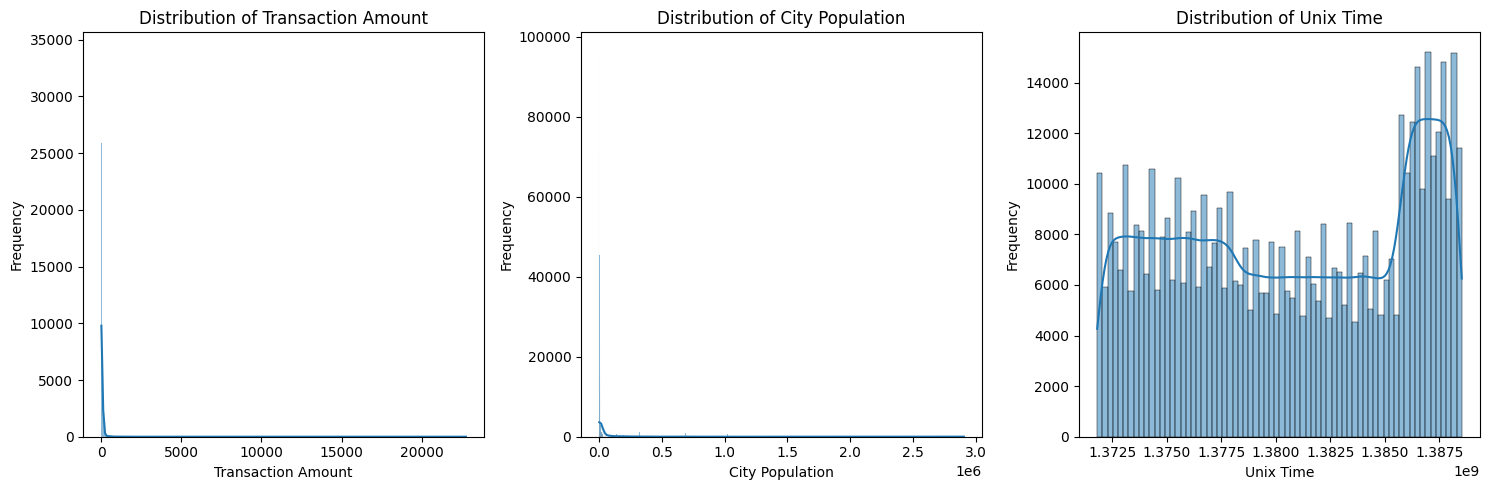

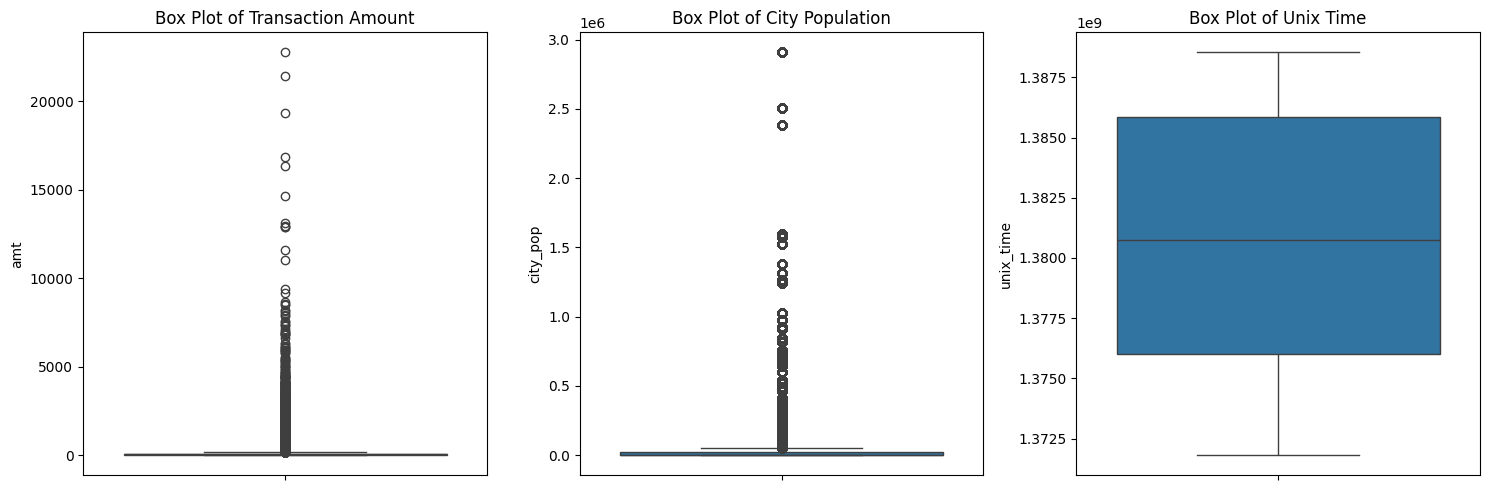

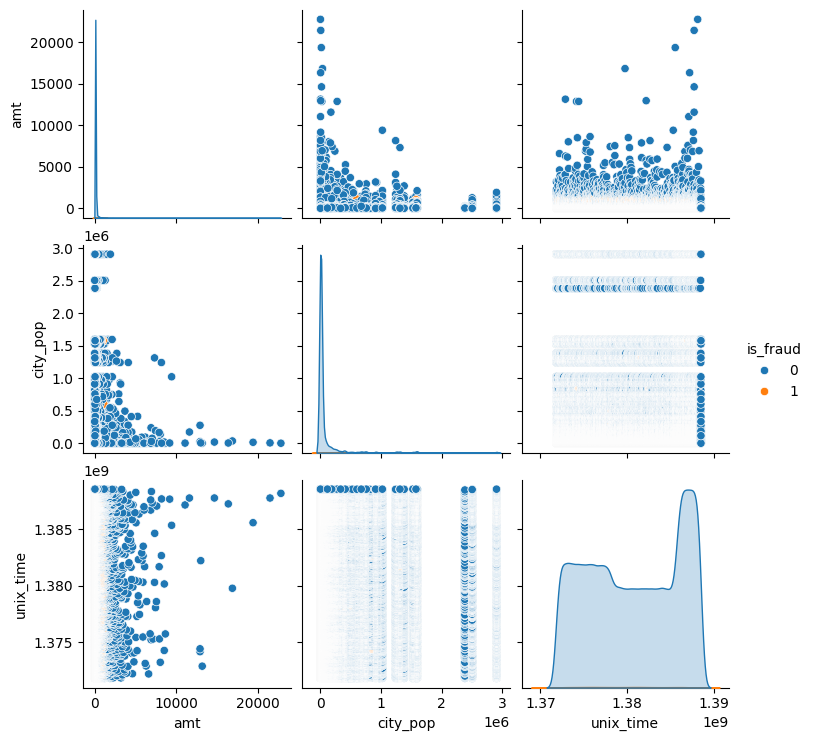

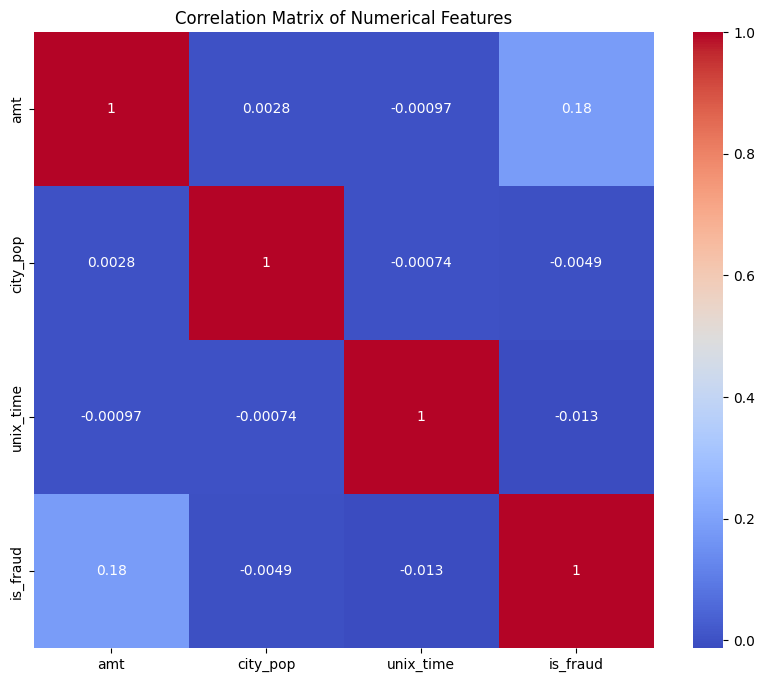

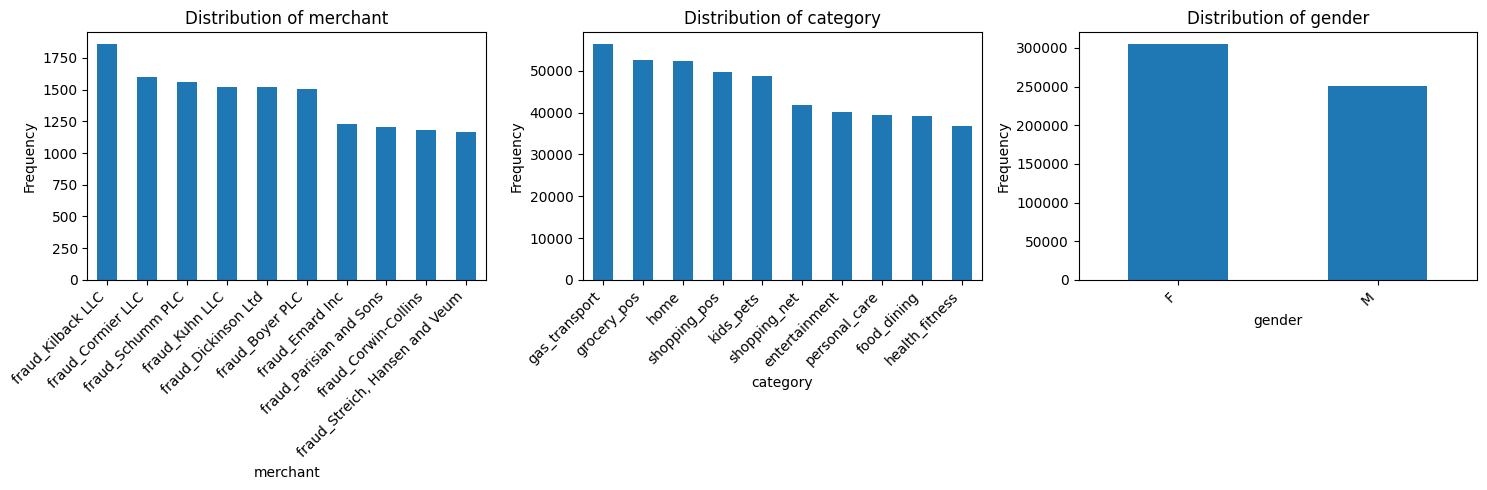

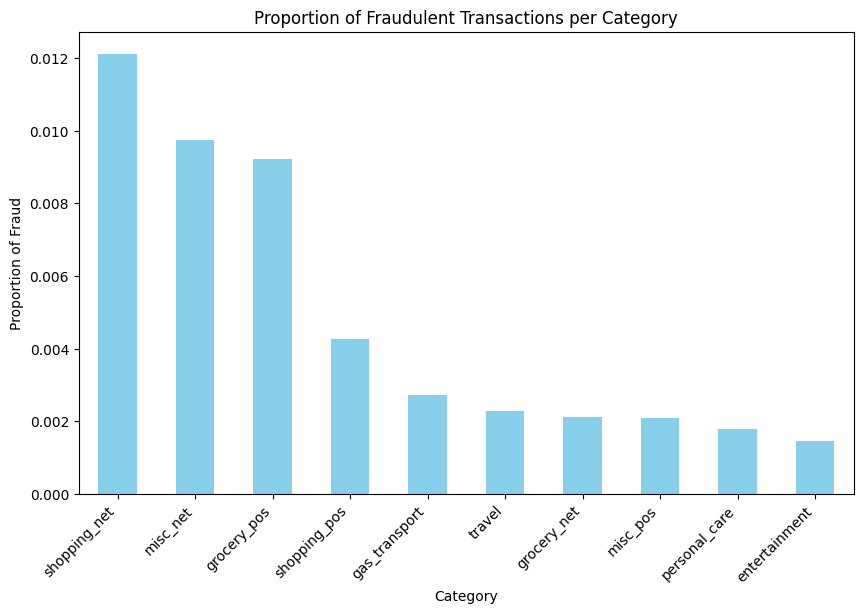

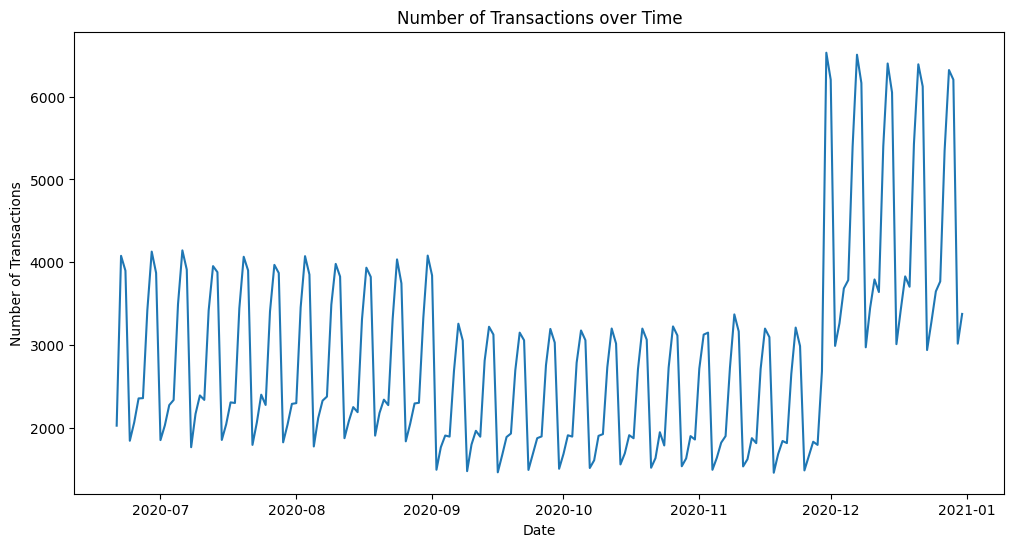

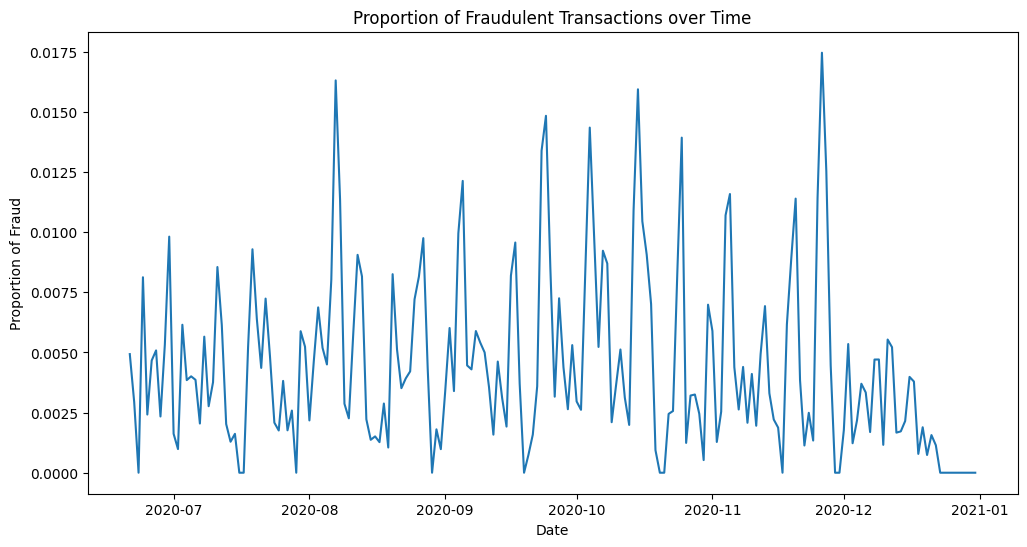

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['amt'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['city_pop'], kde=True)
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['unix_time'], kde=True)
plt.title('Distribution of Unix Time')
plt.xlabel('Unix Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots for key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['amt'])
plt.title('Box Plot of Transaction Amount')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['city_pop'])
plt.title('Box Plot of City Population')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['unix_time'])
plt.title('Box Plot of Unix Time')

plt.tight_layout()
plt.show()

# Scatter plot matrix
sns.pairplot(df[['amt', 'city_pop', 'unix_time', 'is_fraud']], hue='is_fraud', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['amt', 'city_pop', 'unix_time', 'is_fraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Count plots for categorical features
categorical_cols = ['merchant', 'category', 'gender']
plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    df[col].value_counts().nlargest(10).plot(kind='bar') # Limit to top 10 categories for readability
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Fraudulent transactions per category
plt.figure(figsize=(10, 6))
fraud_by_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_category.head(10).plot(kind='bar', color='skyblue') # Show top 10 categories
plt.title('Proportion of Fraudulent Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Proportion of Fraud')
plt.xticks(rotation=45, ha='right')
plt.show()

# Convert 'trans_date_trans_time' to datetime and plot transactions over time
try:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    plt.figure(figsize=(12, 6))
    df.groupby(df['trans_date_trans_time'].dt.date)['trans_num'].count().plot()
    plt.title('Number of Transactions over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.show()

    # Transactions over time, colored by fraud
    plt.figure(figsize=(12, 6))
    df.groupby(df['trans_date_trans_time'].dt.date)['is_fraud'].mean().plot()
    plt.title('Proportion of Fraudulent Transactions over Time')
    plt.xlabel('Date')
    plt.ylabel('Proportion of Fraud')
    plt.show()

except Exception as e:
    print(f"Error converting 'trans_date_trans_time' to datetime: {e}")

## Handle Class Imbalance ( Label Encoding )

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Drop unnecessary columns
df_encoded = df.drop(columns=['trans_date_trans_time', 'trans_num', 'cc_num'], errors='ignore')

# Encode all categorical columns using LabelEncoder
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Define features and target
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 442859, 1: 1716})


c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After SMOTE: Counter({0: 442859, 1: 442859})


##  Model Training and Evaluation Pipeline


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for preprocessing, model building, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest



# -------------------------
# 2. Data Preprocessing
# -------------------------
specified_target = "target"
if specified_target in df.columns:
    target_column = specified_target
    print(f"Using specified target column: {target_column}")
else:
    target_column = df.columns[-1]
    print(f"Specified target column not found. Automatically using the last column: {target_column}")

# Convert the 'timestamp' column (if present) to datetime and extract features.
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['hour'] = df['timestamp'].dt.hour
    # Drop the original timestamp column if not needed
    df = df.drop('timestamp', axis=1)
    print("Extracted datetime features: year, month, day, hour")

# Separate features and target.
X = df.drop(target_column, axis=1)
y = df[target_column]

# In case there are still non-numeric columns (other than the target), you may choose to encode them or drop them.
# For simplicity, we'll drop non-numeric features.
X = X.select_dtypes(include=[np.number])
print("Numeric features used for modeling:")
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# -------------------------
# 3. Model Building & Evaluation for Classification
# -------------------------

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print("\n--- XGBoost ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)
print("\n--- Neural Network (MLPClassifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

# -------------------------
# 4. Anomaly Detection using Isolation Forest
# -------------------------
iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X_train_scaled)
y_pred_iso = iso.predict(X_test_scaled)
print("\n--- Isolation Forest ---")
print("Prediction Counts (1: normal, -1: anomaly):")
print(pd.Series(y_pred_iso).value_counts())


Specified target column not found. Automatically using the last column: is_fraud
Numeric features used for modeling:
Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')

--- Logistic Regression ---
Accuracy: 0.9958432304038005
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144


--- Decision Tree ---
Accuracy: 0.9958792197509537
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.46      0.49      0.48       426

    accuracy                           1.00    111144
   macro avg       0.73      0.74     

c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\xgboost\core.py:158: UserWarning: [23:17:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
Accuracy: 0.9984794500827755
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.91      0.67      0.77       426

    accuracy                           1.00    111144
   macro avg       0.96      0.83      0.88    111144
weighted avg       1.00      1.00      1.00    111144


--- Neural Network (MLPClassifier) ---
Accuracy: 0.9967519614194198
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.71      0.26      0.38       426

    accuracy                           1.00    111144
   macro avg       0.85      0.63      0.69    111144
weighted avg       1.00      1.00      1.00    111144


--- Isolation Forest ---
Prediction Counts (1: normal, -1: anomaly):
 1    100259
-1     10885
Name: count, dtype: int64


## Autoencoder(Unsupervised)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define input dimension and encoding dimension
input_dim = X_train.shape[1]
encoding_dim = 32  # Adjust based on your use case

# Build the autoencoder using Functional API
input_layer = Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Build encoder model separately
encoder = Model(inputs=input_layer, outputs=encoded)

# Get encoded representations
encoded_data = encoder.predict(X_test)

# Now 'encoded_data' can be used for further analysis or anomaly detection


Epoch 1/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 13s 864us/step - loss: nan - val_loss: nan
Epoch 2/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 13s 932us/step - loss: nan - val_loss: nan
Epoch 4/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 859us/step - loss: nan - val_loss: nan
Epoch 5/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 870us/step - loss: nan - val_loss: nan
Epoch 6/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 851us/step - loss: nan - val_loss: nan
Epoch 7/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 850us/step - loss: nan - val_loss: nan
Epoch 8/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 843us/step - loss: nan - val_loss: nan
Epoch 9/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 842us/step - loss: nan - val_loss: nan
Epoch 10/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 839us/step - loss: nan - val_loss: nan
Epoch 11/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 12s 865us/step - loss: nan - val_loss: nan
Epoch 12/50
13893/13893 ━━━━━━━━━━━━━━━━━━━

## Neural Network Classifier (Supervised)

In [8]:
from tensorflow import keras

# Assuming 'X' is your feature data and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust as needed

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))  # Adjust parameters

# Make predictions and evaluate the model
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to class labels
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/50


c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13893/13893 ━━━━━━━━━━━━━━━━━━━━ 14s 983us/step - accuracy: 0.9873 - loss: 328162277851136.0000 - val_accuracy: 0.9962 - val_loss: 38265570721792.0000
Epoch 2/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9930 - loss: 17607696580608.0000 - val_accuracy: 0.9962 - val_loss: 0.0605
Epoch 3/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 14s 977us/step - accuracy: 0.9962 - loss: 0.0358 - val_accuracy: 0.9962 - val_loss: 0.0252
Epoch 4/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 14s 981us/step - accuracy: 0.9962 - loss: 0.0252 - val_accuracy: 0.9962 - val_loss: 0.0252
Epoch 5/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 13s 960us/step - accuracy: 0.9960 - loss: 0.0261 - val_accuracy: 0.9962 - val_loss: 0.0252
Epoch 6/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 13s 951us/step - accuracy: 0.9961 - loss: 0.0256 - val_accuracy: 0.9962 - val_loss: 0.0252
Epoch 7/50
13893/13893 ━━━━━━━━━━━━━━━━━━━━ 13s 954us/step - accuracy: 0.9961 - loss: 0.0257 - val_accuracy: 0.9962 - val_loss: 0.0252
Epoch 8/50
13893/13893 ━━━━━

c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## Model Performance Comparison ( Before    Hyperparameter Tuning )


Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.995843   0.000000  0.000000  0.000000  0.869896
Decision Tree        0.995879   0.464286  0.488263  0.475973  0.743048
Random Forest        0.997868   0.882591  0.511737  0.647845  0.981560
XGBoost              0.998479   0.913183  0.666667  0.770692  0.995485
MLP Classifier       0.996752   0.709677  0.258216  0.378657  0.950913


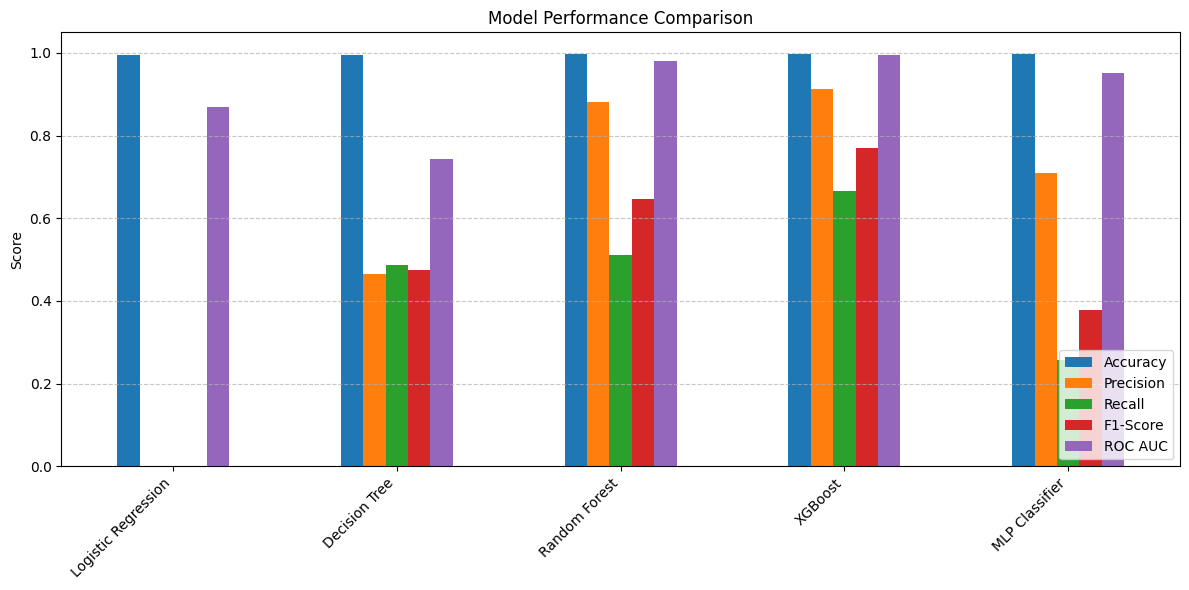

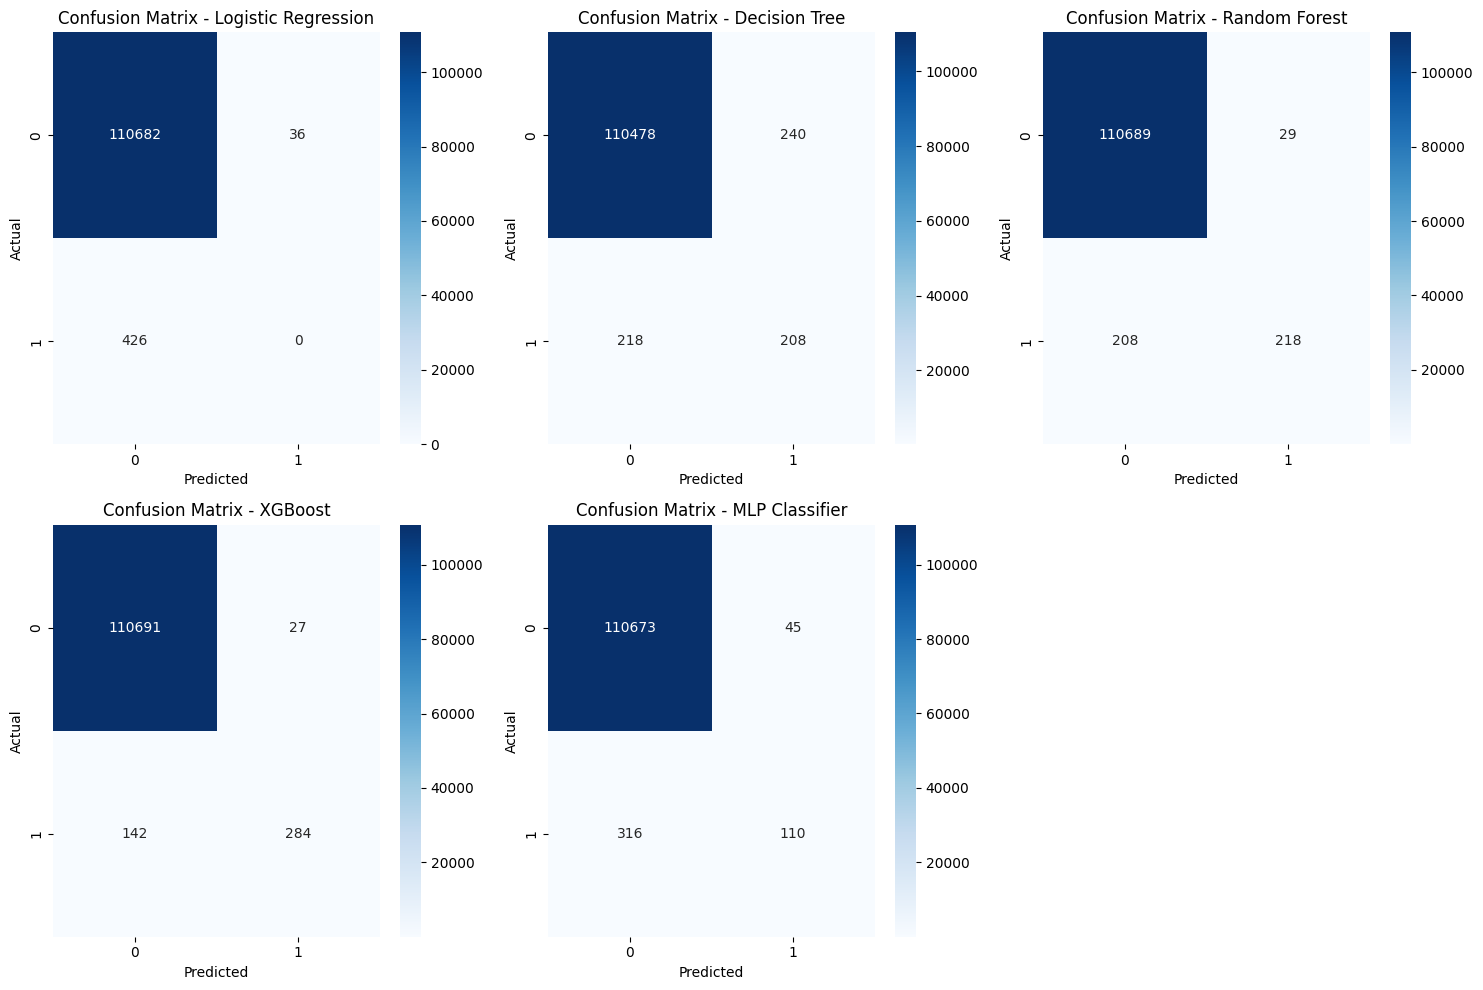

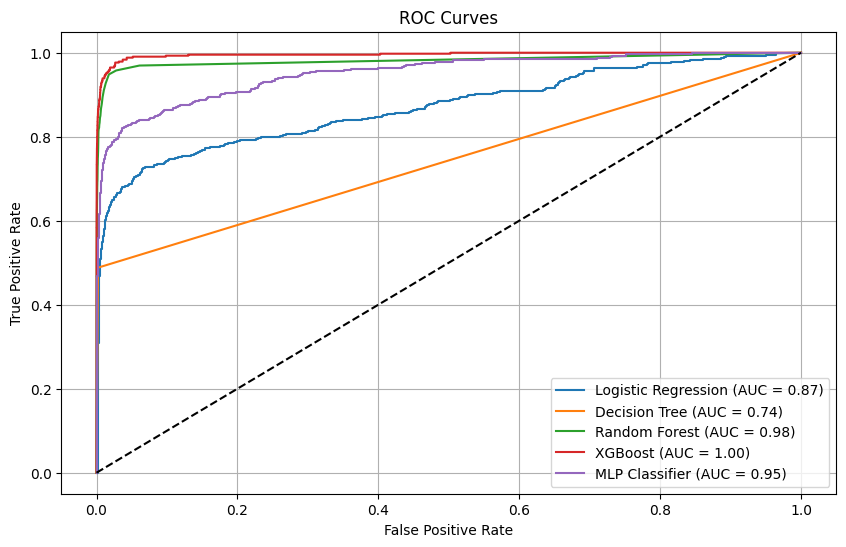

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

# ---------------------------
# STEP 1: Calculate performance metrics
# ---------------------------
# Dictionary to store model performance
metrics_dict = {}

# Define your models in a dictionary
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
    'MLP Classifier': nn
}

# Assume predictions have already been made; if not, you can generate them here.
# For example:
predictions = {}
for model_name, model in models.items():
    # For classifiers with predict_proba method, use it to obtain probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # Fallback if the classifier does not support predict_proba
        y_pred = model.predict(X_test_scaled)
        y_proba = None

    predictions[model_name] = y_pred

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test, y_proba)
    else:
        metrics['ROC AUC'] = None

    metrics_dict[model_name] = metrics

# Convert the metrics dictionary to a DataFrame for a clean view
metrics_df = pd.DataFrame(metrics_dict).T
print("\nModel Performance Comparison:\n")
print(metrics_df)

# ---------------------------
# STEP 2: Bar Chart Comparison of Performance Metrics
# ---------------------------
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------------------
# STEP 3: Plot Confusion Matrices for Each Model
# ---------------------------
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ---------------------------
# STEP 4: Plot ROC Curves for Each Model
# ---------------------------
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


2.

c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3474/3474 ━━━━━━━━━━━━━━━━━━━━ 2s 431us/step
3474/3474 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step
3474/3474 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step

Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.995843   0.000000  0.000000  0.000000  0.869896
Decision Tree        0.995879   0.464286  0.488263  0.475973  0.743048
Random Forest        0.997868   0.882591  0.511737  0.647845  0.981560
XGBoost              0.998479   0.913183  0.666667  0.770692  0.995485
MLP Classifier       0.996752   0.709677  0.258216  0.378657  0.950913
Keras Neural Net     0.996167   0.000000  0.000000  0.000000  0.500000


c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


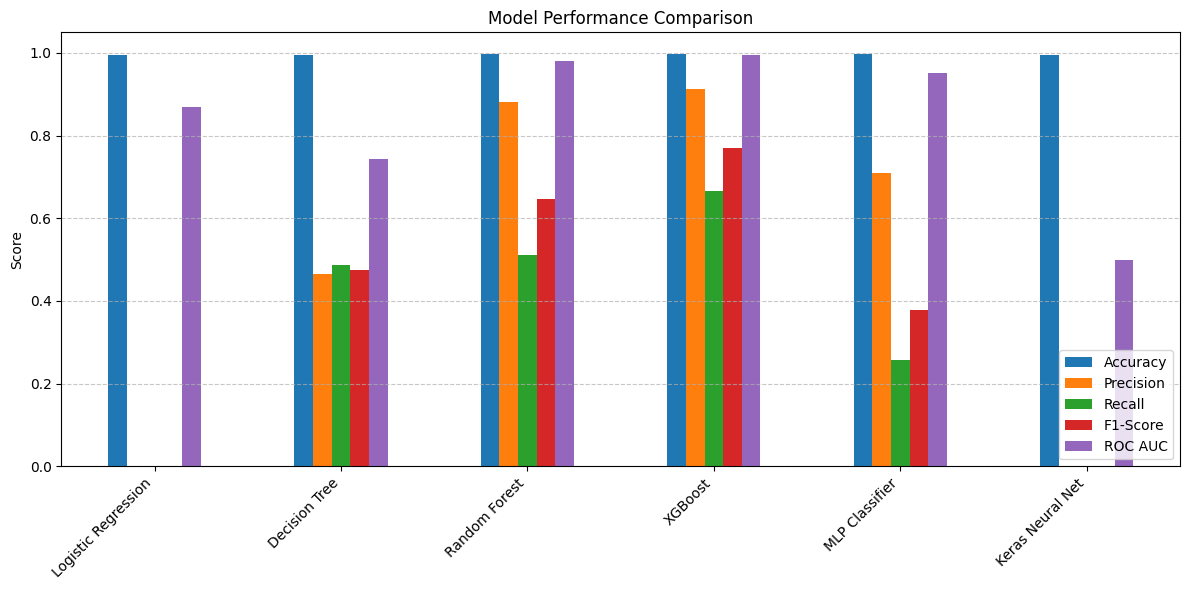

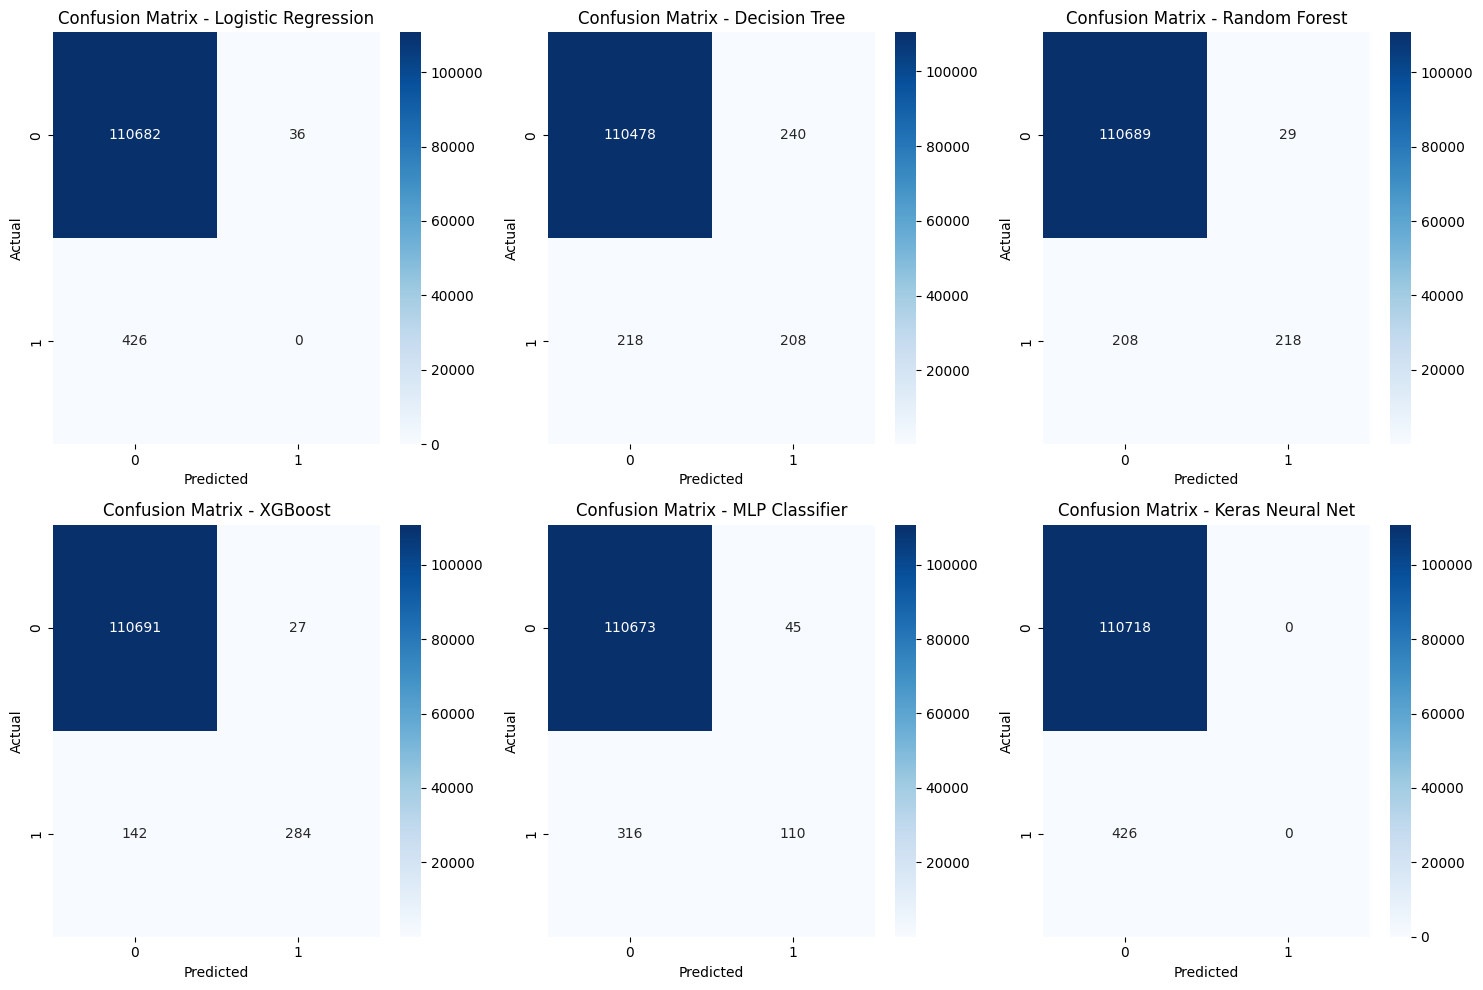

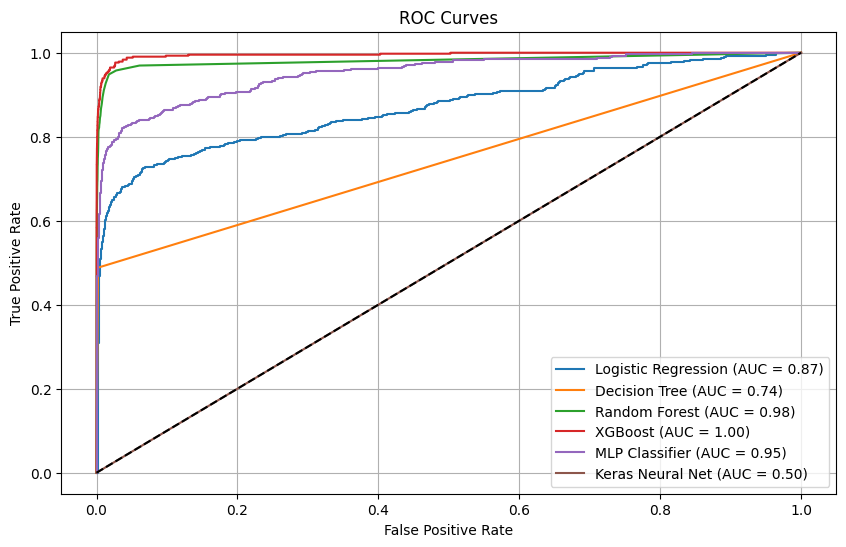

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
)
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, Model, Input

# ---------------------------
# STEP 0: Split Data
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# STEP 1: Train Neural Network Classifier (TF/Keras)
# ---------------------------
nn_model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions and store
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
y_proba_nn = nn_model.predict(X_test).flatten()  # Probabilities

# ---------------------------
# STEP 2: Train Autoencoder (Unsupervised)
# ---------------------------
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=0)

# Encode features for further analysis (optional)
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_data = encoder.predict(X_test)

# ---------------------------
# STEP 3: Evaluate and Compare All Models
# ---------------------------

# Add neural network to models
models['Keras Neural Net'] = nn_model  # for naming
predictions = {}
metrics_dict = {}

for model_name, model in models.items():
    if model_name == 'Keras Neural Net':
        y_pred = y_pred_nn
        y_proba = y_proba_nn
    else:
        if hasattr(model, "predict_proba"):
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred = model.predict(X_test_scaled)
            y_proba = None

    predictions[model_name] = y_pred

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test, y_proba)
    else:
        metrics['ROC AUC'] = None

    metrics_dict[model_name] = metrics

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T
print("\nModel Performance Comparison:\n")
print(metrics_df)

# ---------------------------
# STEP 4: Bar Chart Comparison
# ---------------------------
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------------------
# STEP 5: Confusion Matrices
# ---------------------------
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ---------------------------
# STEP 6: ROC Curves
# ---------------------------
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if model_name == 'Keras Neural Net':
        y_proba = y_proba_nn
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = None

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Feature Selection, Hyperparameter Tuning & Ensemble Modeling

In this step, we performed feature selection using ANOVA F-test to identify the top 15 predictive features. 
Then, we trained and optimized multiple models (Random Forest, XGBoost, and MLPClassifier) using hyperparameter tuning techniques. 
Finally, we built an ensemble Voting Classifier to combine their strengths and improve prediction accuracy.


In [ ]:
# --------------------------
# 1. Feature Selection
# --------------------------
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print("Selected Features:", selected_features.tolist())

# Re-split and scale
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_selected, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

# --------------------------
# 2. Hyperparameter Tuning - Random Forest
# --------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_fs, y_train_fs)
best_rf = grid_rf.best_estimator_

# --------------------------
# 3. Hyperparameter Tuning - XGBoost
# --------------------------
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                              param_distributions=param_dist_xgb, n_iter=10, scoring='f1', cv=3, random_state=42)
rand_xgb.fit(X_train_fs, y_train_fs)
best_xgb = rand_xgb.best_estimator_

# --------------------------
# 4. Neural Network (MLPClassifier)
# --------------------------
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp.fit(X_train_fs, y_train_fs)

# --------------------------
# 5. Evaluation Function
# --------------------------
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate all
evaluate_model("Optimized Random Forest", best_rf, X_test_fs, y_test_fs)
evaluate_model("Optimized XGBoost", best_xgb, X_test_fs, y_test_fs)
evaluate_model("MLP Classifier", mlp, X_test_fs, y_test_fs)

# --------------------------
# 6. (Optional) Ensemble Voting Classifier
# --------------------------
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('mlp', mlp)
], voting='hard')

ensemble_model.fit(X_train_fs, y_train_fs)
evaluate_model("Ensemble Voting", ensemble_model, X_test_fs, y_test_fs)


c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=10. All the features will be returned.
  warnings.warn(


Selected Features: ['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
Fitting 3 folds for each of 24 candidates, totalling 72 fits


## Model Performance Comparison ( After   Hyperparameter Tuning )

## try 


=== Optimized Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.88      0.51      0.65       426

    accuracy                           1.00    111144
   macro avg       0.94      0.76      0.82    111144
weighted avg       1.00      1.00      1.00    111144


=== Optimized XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.93      0.79      0.85       426

    accuracy                           1.00    111144
   macro avg       0.96      0.90      0.93    111144
weighted avg       1.00      1.00      1.00    111144


=== MLP Classifier Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.65      0.36      0.46       426

    accuracy                    

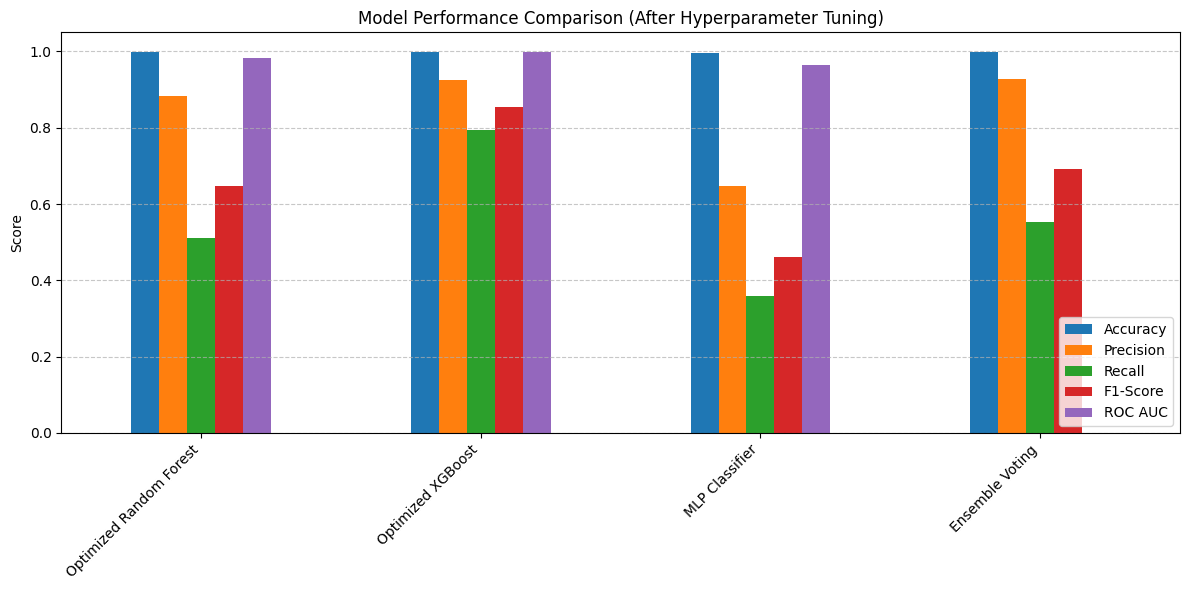

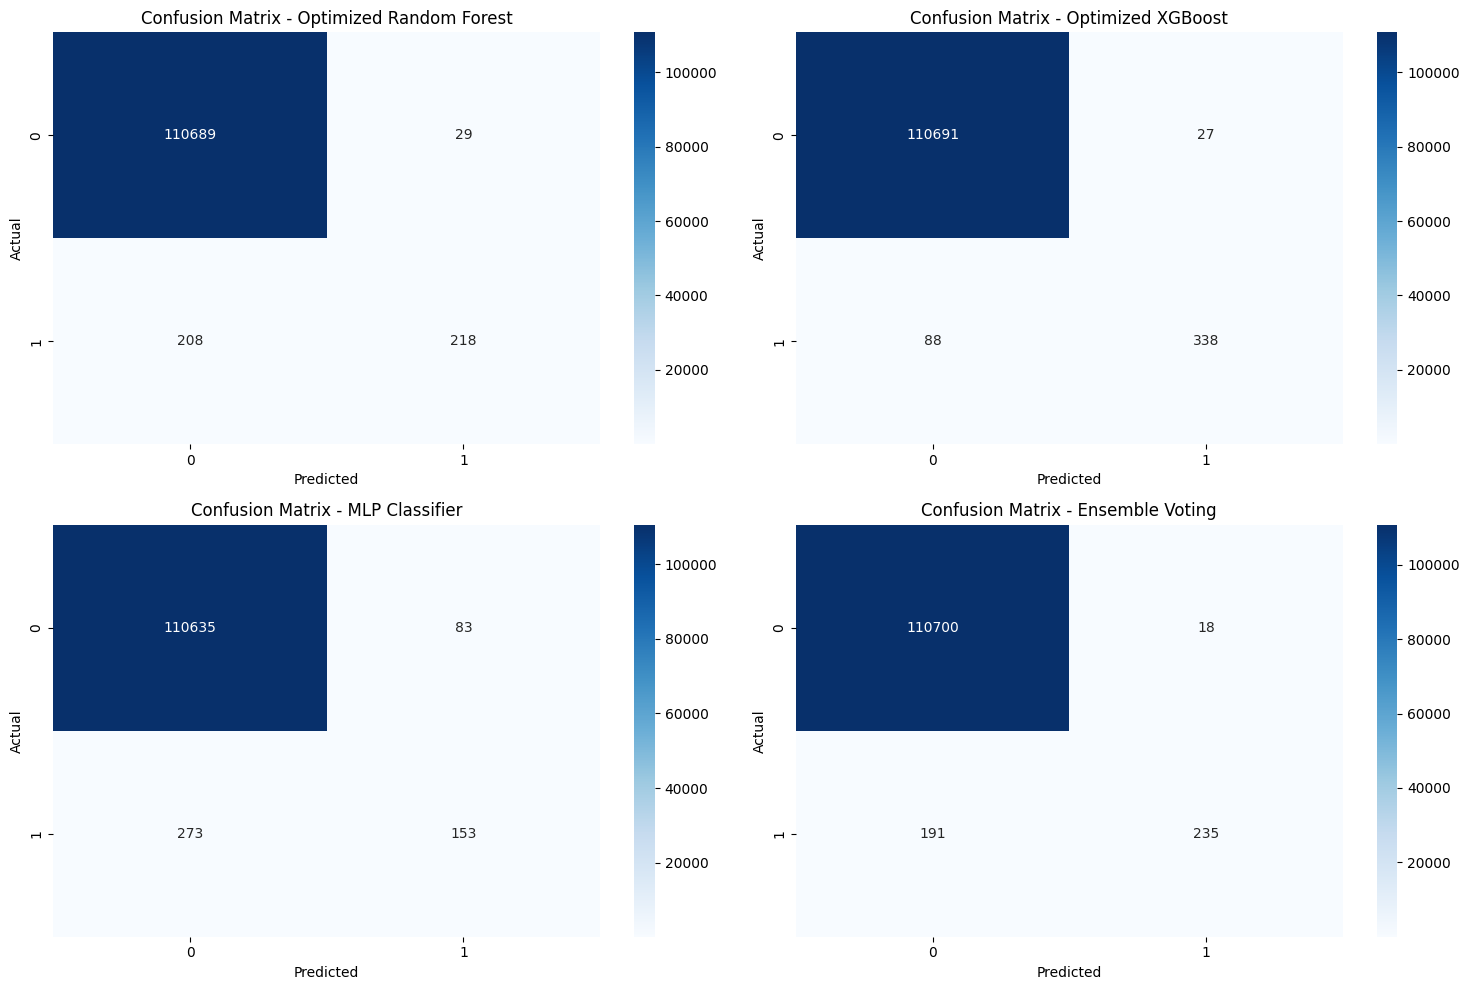

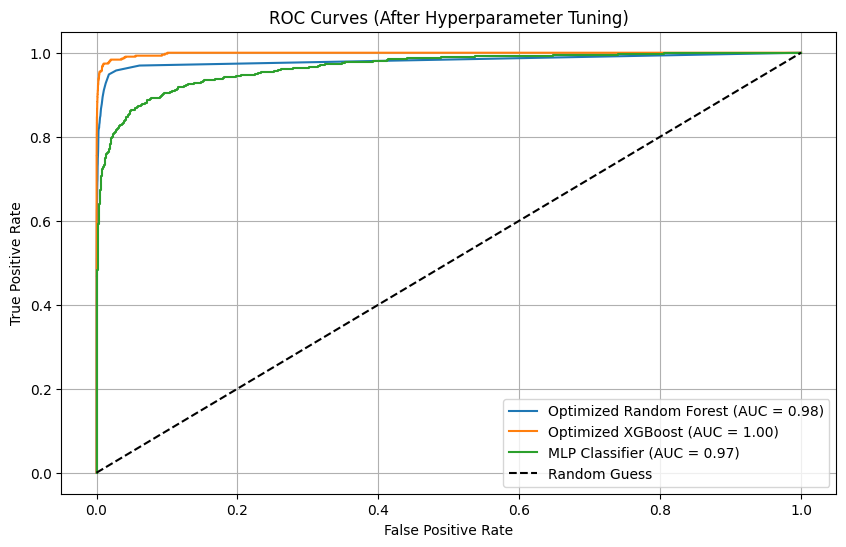

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
)

# Define a dictionary of your hyperparameter-tuned models
models = {
    'Optimized Random Forest': best_rf,
    'Optimized XGBoost': best_xgb,
    'MLP Classifier': mlp,
    'Ensemble Voting': ensemble_model
}

# Dictionaries to store predictions and computed metrics for each model
predictions = {}
metrics_dict = {}

# Loop through each model for evaluation
for model_name, model in models.items():
    # Use predict_proba if available to generate probability estimates for ROC AUC,
    # then threshold at 0.5 to generate class predictions.
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_fs)[:, 1]
        y_pred = (y_proba > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test_fs)
        y_proba = None

    predictions[model_name] = y_pred

    # Compute evaluation metrics
    metrics = {
        'Accuracy': accuracy_score(y_test_fs, y_pred),
        'Precision': precision_score(y_test_fs, y_pred),
        'Recall': recall_score(y_test_fs, y_pred),
        'F1-Score': f1_score(y_test_fs, y_pred)
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test_fs, y_proba)
    else:
        metrics['ROC AUC'] = None

    metrics_dict[model_name] = metrics

    # Print the detailed classification report
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_test_fs, y_pred))

# Convert the metrics dictionary into a DataFrame for easier visualization and comparison
metrics_df = pd.DataFrame(metrics_dict).T
print("\nModel Performance Comparison (After Hyperparameter Tuning):\n")
print(metrics_df)

# --------------------------------------------
# Visualization 1: Bar Chart of Performance Metrics
# --------------------------------------------
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison (After Hyperparameter Tuning)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------------------------------------------
# Visualization 2: Confusion Matrices for Each Model
# --------------------------------------------
plt.figure(figsize=(15, 10))
num_models = len(predictions)
cols = 2  # Adjust the number of columns as needed
rows = (num_models // cols) + int(num_models % cols > 0)
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test_fs, y_pred)
    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# --------------------------------------------
# Visualization 3: ROC Curves for Each Model
# --------------------------------------------
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_fs)[:, 1]
    else:
        y_proba = None
    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test_fs, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves (After Hyperparameter Tuning)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.995843   0.000000  0.000000  0.000000  0.869896
Decision Tree        0.995879   0.464286  0.488263  0.475973  0.743048
Random Forest        0.997868   0.882591  0.511737  0.647845  0.981560
XGBoost              0.998479   0.913183  0.666667  0.770692  0.995485
MLP Classifier       0.996752   0.709677  0.258216  0.378657  0.950913


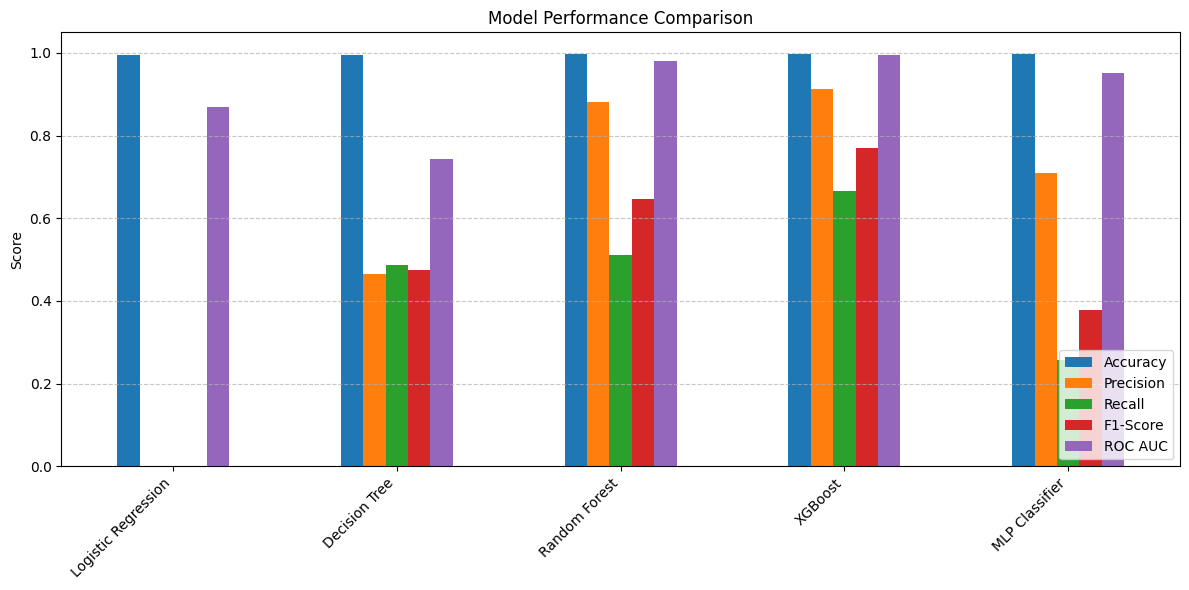

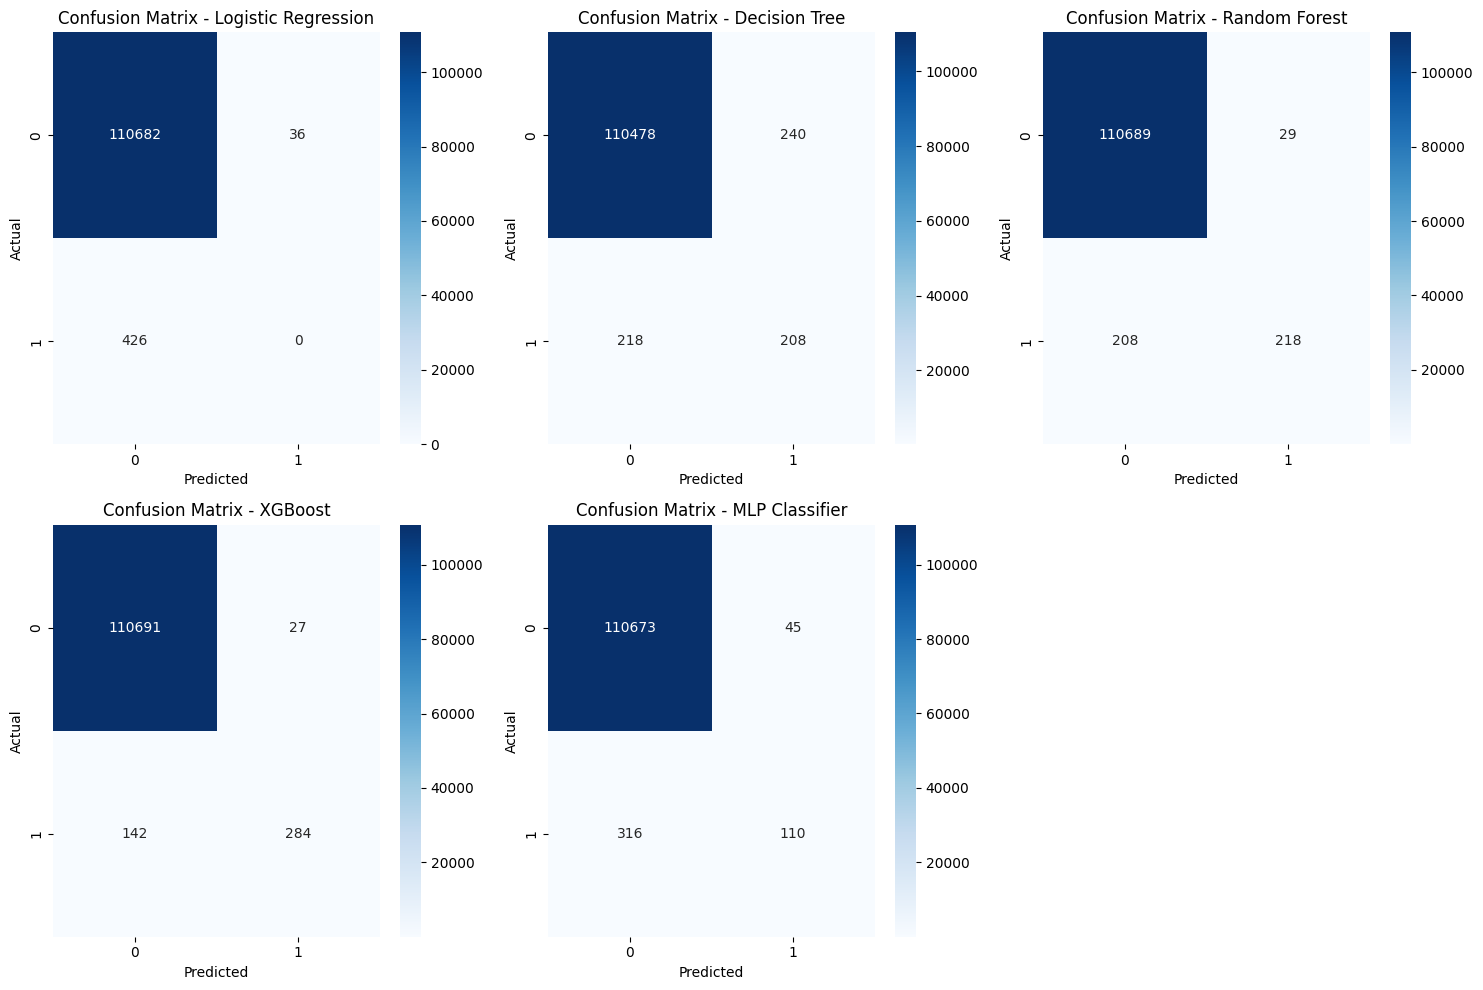

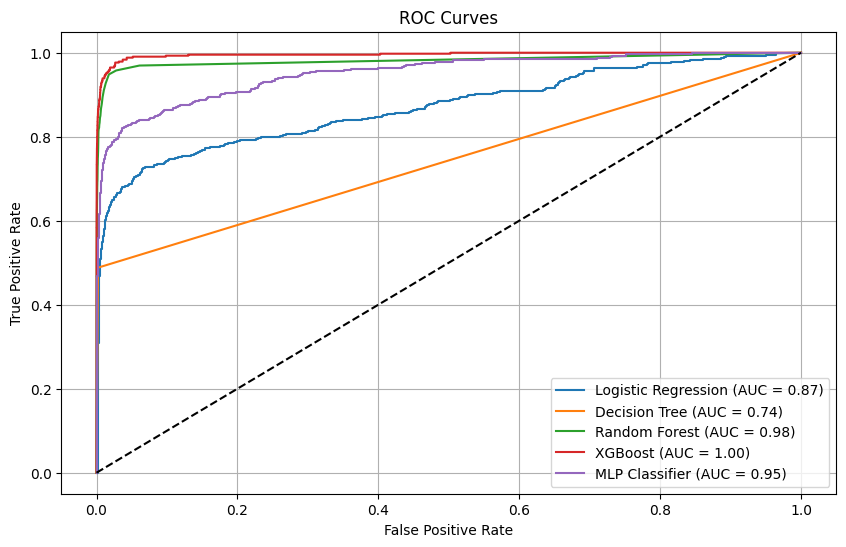

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

# ---------------------------
# STEP 1: Calculate performance metrics
# ---------------------------
# Dictionary to store model performance
metrics_dict = {}

# Define your models in a dictionary
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
    'MLP Classifier': nn
}

# Assume predictions have already been made; if not, you can generate them here.
# For example:
predictions = {}
for model_name, model in models.items():
    # For classifiers with predict_proba method, use it to obtain probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # Fallback if the classifier does not support predict_proba
        y_pred = model.predict(X_test_scaled)
        y_proba = None

    predictions[model_name] = y_pred

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test, y_proba)
    else:
        metrics['ROC AUC'] = None

    metrics_dict[model_name] = metrics

# Convert the metrics dictionary to a DataFrame for a clean view
metrics_df = pd.DataFrame(metrics_dict).T
print("\nModel Performance Comparison:\n")
print(metrics_df)

# ---------------------------
# STEP 2: Bar Chart Comparison of Performance Metrics
# ---------------------------
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------------------
# STEP 3: Plot Confusion Matrices for Each Model
# ---------------------------
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ---------------------------
# STEP 4: Plot ROC Curves for Each Model
# ---------------------------
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


2.

c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3474/3474 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step
3474/3474 ━━━━━━━━━━━━━━━━━━━━ 2s 485us/step
3474/3474 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step

Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.995843   0.000000  0.000000  0.000000  0.869896
Decision Tree        0.995879   0.464286  0.488263  0.475973  0.743048
Random Forest        0.997868   0.882591  0.511737  0.647845  0.981560
XGBoost              0.998479   0.913183  0.666667  0.770692  0.995485
MLP Classifier       0.996752   0.709677  0.258216  0.378657  0.950913
Keras Neural Net     0.996167   0.000000  0.000000  0.000000  0.500000


c:\Users\PRASEN\EDUCATION\All Software\anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


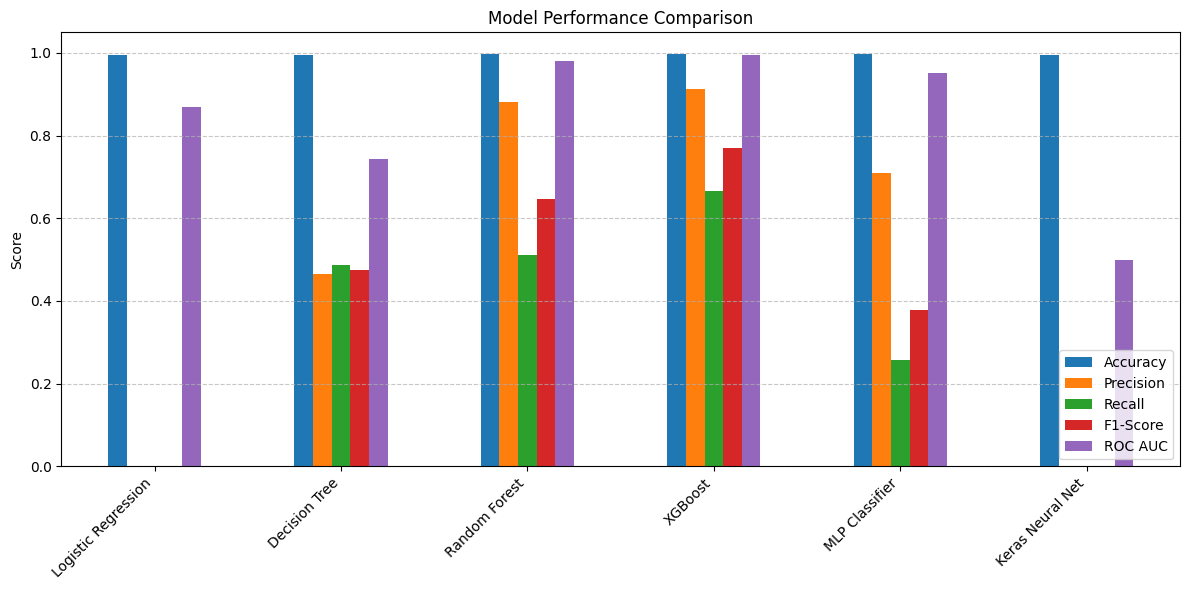

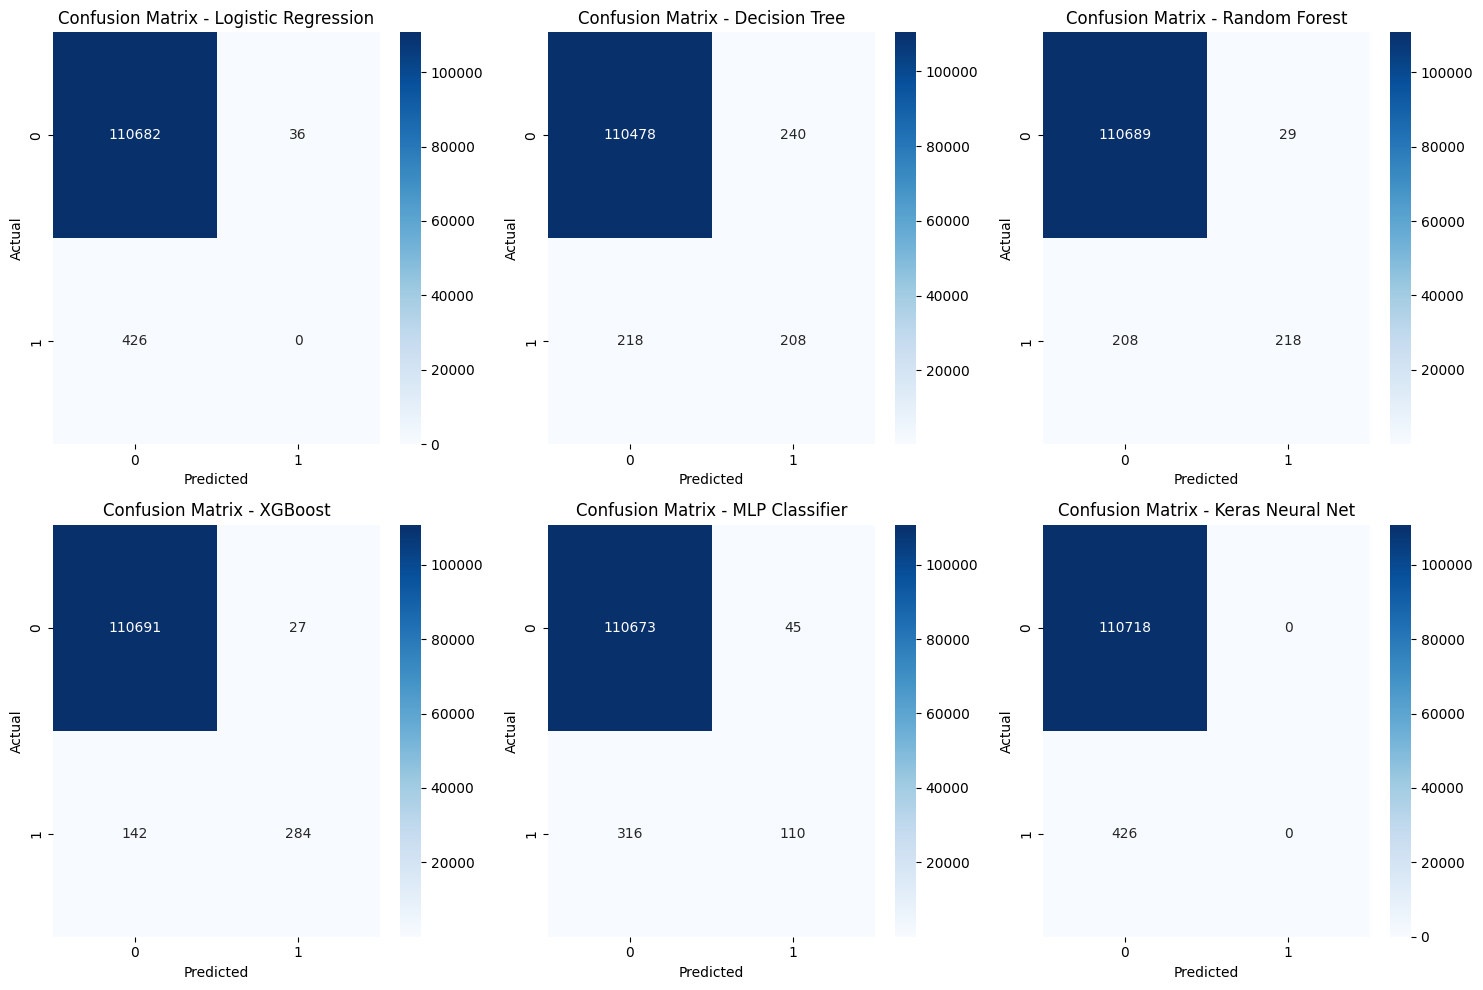

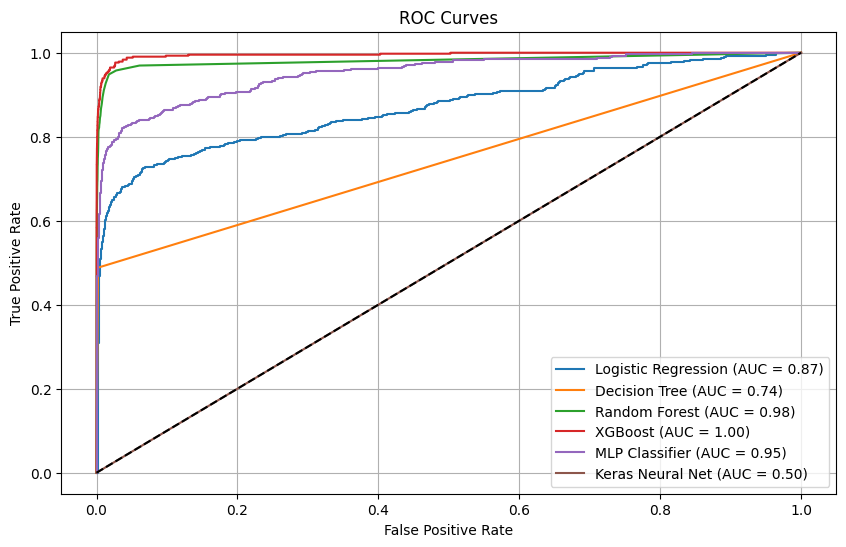

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
)
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, Model, Input

# ---------------------------
# STEP 0: Split Data
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# STEP 1: Train Neural Network Classifier (TF/Keras)
# ---------------------------
nn_model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions and store
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
y_proba_nn = nn_model.predict(X_test).flatten()  # Probabilities

# ---------------------------
# STEP 2: Train Autoencoder (Unsupervised)
# ---------------------------
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=0)

# Encode features for further analysis (optional)
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_data = encoder.predict(X_test)

# ---------------------------
# STEP 3: Evaluate and Compare All Models
# ---------------------------

# Add neural network to models
models['Keras Neural Net'] = nn_model  # for naming
predictions = {}
metrics_dict = {}

for model_name, model in models.items():
    if model_name == 'Keras Neural Net':
        y_pred = y_pred_nn
        y_proba = y_proba_nn
    else:
        if hasattr(model, "predict_proba"):
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred = model.predict(X_test_scaled)
            y_proba = None

    predictions[model_name] = y_pred

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test, y_proba)
    else:
        metrics['ROC AUC'] = None

    metrics_dict[model_name] = metrics

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T
print("\nModel Performance Comparison:\n")
print(metrics_df)

# ---------------------------
# STEP 4: Bar Chart Comparison
# ---------------------------
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------------------
# STEP 5: Confusion Matrices
# ---------------------------
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ---------------------------
# STEP 6: ROC Curves
# ---------------------------
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if model_name == 'Keras Neural Net':
        y_proba = y_proba_nn
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = None

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Model Testing

=== Final Model Test Evaluation ===
Accuracy: 0.9989653062693443
Precision: 0.9260273972602739
Recall: 0.7934272300469484
F1 Score: 0.854614412136536
ROC AUC Score: 0.9983323109838665

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.93      0.79      0.85       426

    accuracy                           1.00    111144
   macro avg       0.96      0.90      0.93    111144
weighted avg       1.00      1.00      1.00    111144



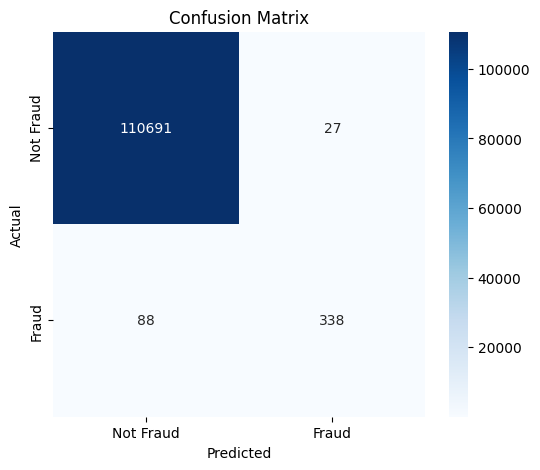

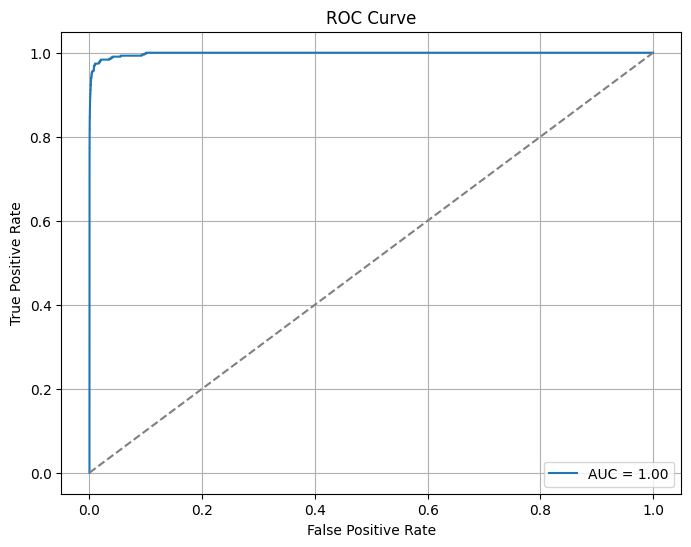

✅ Model saved as 'best_fraud_model.pkl'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import joblib  # for saving the model

# Let's assume best_model is already trained (e.g. best_xgb or best_rf or ensemble_model)
# If not, replace 'best_model' with your chosen trained model
model_to_test = best_xgb  # or best_rf / mlp / ensemble_model

# ----------------------------
# 1. Predict on Test Set
# ----------------------------
y_pred = model_to_test.predict(X_test_fs)
y_prob = model_to_test.predict_proba(X_test_fs)[:, 1] if hasattr(model_to_test, "predict_proba") else y_pred

# ----------------------------
# 2. Evaluation Metrics
# ----------------------------
print("=== Final Model Test Evaluation ===")
print("Accuracy:", accuracy_score(y_test_fs, y_pred))
print("Precision:", precision_score(y_test_fs, y_pred))
print("Recall:", recall_score(y_test_fs, y_pred))
print("F1 Score:", f1_score(y_test_fs, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_fs, y_prob))
print("\nClassification Report:\n", classification_report(y_test_fs, y_pred))

# ----------------------------
# 3. Confusion Matrix
# ----------------------------
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_fs, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ----------------------------
# 4. ROC Curve
# ----------------------------
fpr, tpr, thresholds = roc_curve(y_test_fs, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_fs, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 5. Save the Model
# ----------------------------
joblib.dump(model_to_test, "best_fraud_model.pkl")
print("✅ Model saved as 'best_fraud_model.pkl'")


## Deployment